In [25]:
import pandas as pd

In [26]:
df = pd.read_excel("employee_salary_sheet.xlsx")


In [27]:
print(df.head())


   Employee_ID  age         occupation  hours-per-week  Predicted_Salary
0            0   25  Machine-op-inspct              40             35000
1            1   38    Farming-fishing              50             35000
2            2   28    Protective-serv              40             65000
3            3   44  Machine-op-inspct              40             65000
4            4   18                  ?              30             35000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       48842 non-null  int64 
 1   age               48842 non-null  int64 
 2   occupation        48842 non-null  object
 3   hours-per-week    48842 non-null  int64 
 4   Predicted_Salary  48842 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.9+ MB


In [29]:
df.shape

(48842, 5)

In [30]:
df.isna().sum()

Employee_ID         0
age                 0
occupation          0
hours-per-week      0
Predicted_Salary    0
dtype: int64

In [31]:
#data.dropna(inplace=True) For dropping NA values in the dataset

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.head(3)

,Employee_ID,age,occupation,hours-per-week,Predicted_Salary
0,0,25,Machine-op-inspct,40,35000
1,1,38,Farming-fishing,50,35000
2,2,28,Protective-serv,40,65000


In [35]:
import matplotlib.pyplot as plt

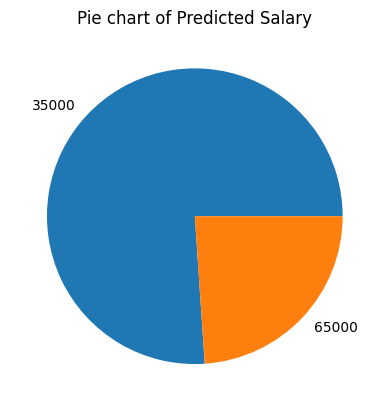

In [42]:
df["Predicted_Salary"].value_counts().sort_values(ascending= False).plot(kind="pie")
plt.title("Pie chart of Predicted Salary")
plt.ylabel("")
plt.show()


In [43]:
df.head(2)

,Employee_ID,age,occupation,hours-per-week,Predicted_Salary
0,0,25,Machine-op-inspct,40,35000
1,1,38,Farming-fishing,50,35000


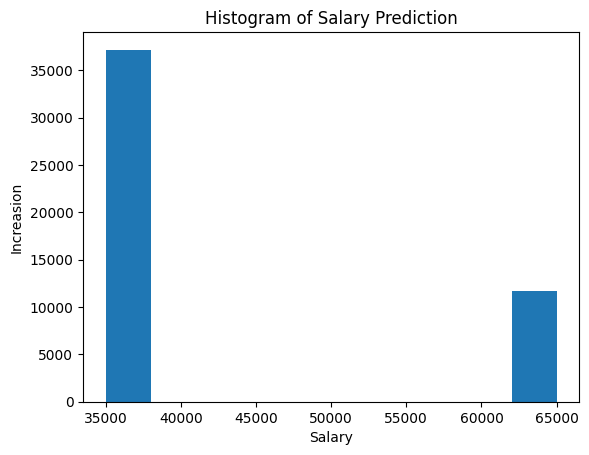

In [49]:
plt.hist(df["Predicted_Salary"])
plt.title("Histogram of Salary Prediction")
plt.xlabel("Salary")
plt.ylabel("Increasion")
plt.show()

In [50]:
df["Predicted_Salary"].describe()

count    48842.000000
mean     42178.452971
std      12799.482657
min      35000.000000
25%      35000.000000
50%      35000.000000
75%      35000.000000
max      65000.000000
Name: Predicted_Salary, dtype: float64

In [86]:
df.groupby("occupation")["Predicted_Salary"].mean().sort_values(ascending= False)


occupation
Exec-managerial      49334.538285
Prof-specialty       48532.080363
Armed-Forces         45000.000000
Protective-serv      44399.796541
Tech-support         43713.692946
Sales                43039.607558
Craft-repair         41788.285340
Transport-moving     41127.388535
Adm-clerical         39106.219925
Machine-op-inspct    38692.918597
Farming-fishing      38483.221477
Handlers-cleaners    36998.069498
Other-service        36243.144424
Priv-house-serv      35371.900826
Name: Predicted_Salary, dtype: float64

In [ ]:
df.groupby("Employee_ID")["Predicted_Salary"].mean().sort_values(ascending= False).head(7).plot(kind="bar")
plt.title("Average Salary By Employee ID")
plt.xlabel("Employee_ID")
plt.ylabel("Average Salary")
plt.show()

In [56]:
df

,Employee_ID,age,occupation,hours-per-week,Predicted_Salary
0,0,25,Machine-op-inspct,40,35000
1,1,38,Farming-fishing,50,35000
2,2,28,Protective-serv,40,65000
3,3,44,Machine-op-inspct,40,65000
4,4,18,?,30,35000
...,...,...,...,...,...
48837,48837,27,Tech-support,38,35000
48838,48838,40,Machine-op-inspct,40,65000
48839,48839,58,Adm-clerical,40,35000
48840,48840,22,Adm-clerical,20,35000


In [58]:
df.columns

Index(['Employee_ID', 'age', 'occupation', 'hours-per-week',
       'Predicted_Salary'],
      dtype='object')

In [83]:
len(y_train)

36826

In [84]:
len(x_test)

9207

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = df[df["occupation"] != "?"].copy()  # ✅ this creates a new DataFrame
df["occupation_encoded"] = le.fit_transform(df["occupation"])  # ✅ now it's safe


# Define features and target
x = df[["age", "hours-per-week", "occupation_encoded"]]
y = df["Predicted_Salary"]

# Split and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lr = LinearRegression()
lr.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
predslr= lr.predict(x_test)

In [78]:
from sklearn.metrics import mean_absolute_error

In [79]:
mean_absolute_error(predslr,y_test)

10245.864681891757

In [82]:
import joblib
joblib.dump(lr,"linearmodel.pkl")

['linearmodel.pkl']

In [3]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset
df = pd.read_excel("employee_salary_sheet.xlsx")
df.columns = df.columns.str.strip()

# Drop missing values
df = df.dropna(subset=["occupation", "age", "Predicted_Salary"])

# 👉 Encode Occupation (convert string to number)
le = LabelEncoder()
df["occupation_encoded"] = le.fit_transform(df["occupation"])

# Save the encoder for use in app.py
joblib.dump(le, "occupation_encoder.pkl")

# Features and target
X = df[["Employee_ID", "occupation_encoded", "age"]]
y = df["Predicted_Salary"]

# Train and save model
model = LinearRegression()
model.fit(X, y)
joblib.dump(model, "linearmodel.pkl")

print("✅ Model and encoder saved.")



✅ Model and encoder saved.
